In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/AI_project/AIproject/Augmented Images/Augmented Images/Augmented Images',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 8140 files belonging to 6 classes.


In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/AI_project/AIproject/Augmented Images/Augmented Images',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 12360 files belonging to 7 classes.


In [ ]:
cnn = tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

ValueError: Exception encountered when calling layer "conv2d_15" (type Conv2D).

Negative dimension size caused by subtracting 3 from 2 for '{{node conv2d_15/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_15/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,256], [3,3,256,256].

Call arguments received by layer "conv2d_15" (type Conv2D):
  • inputs=tf.Tensor(shape=(None, 2, 2, 256), dtype=float32)

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.4))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=6,activation='softmax'))

In [ ]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

In [ ]:
training_history = cnn.fit(x=training_set, validation_data=validation_set, epochs=5)

Epoch 1/5
254/254 [==============================] - 1579s 6s/step - loss: 0.7324 - accuracy: 0.7089 - val_loss: 0.2241 - val_accuracy: 0.9219
Epoch 2/5
254/254 [==============================] - 1274s 5s/step - loss: 0.1388 - accuracy: 0.9549 - val_loss: 0.0439 - val_accuracy: 0.9871
Epoch 3/5
254/254 [==============================] - 1252s 5s/step - loss: 0.0612 - accuracy: 0.9805 - val_loss: 0.0278 - val_accuracy: 0.9904
Epoch 4/5
254/254 [==============================] - 1298s 5s/step - loss: 0.0378 - accuracy: 0.9885 - val_loss: 0.0239 - val_accuracy: 0.9927
Epoch 5/5
254/254 [==============================] - 1295s 5s/step - loss: 0.0636 - accuracy: 0.9803 - val_loss: 0.0128 - val_accuracy: 0.9967


In [ ]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

254/254 [==============================] - 293s 1s/step - loss: 0.0128 - accuracy: 0.9967
Training accuracy: 0.9966748952865601


In [ ]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

254/254 [==============================] - 286s 1s/step - loss: 0.0128 - accuracy: 0.9967
Validation accuracy: 0.9966748952865601


In [ ]:
cnn.save('trained_plant_model.keras')

In [132]:
training_history.history

NameError: name 'training_history' is not defined

In [131]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

NameError: name 'training_history' is not defined

In [ ]:
print(training_history.history.keys())

In [ ]:
class_name = validation_set.class_names

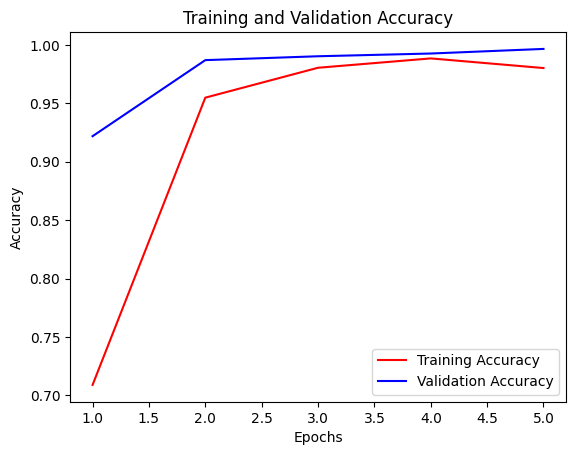

In [145]:
import os
import json
import matplotlib.pyplot as plt

# Check if the file exists and is not empty
file_path = '/content/drive/MyDrive/AI_project/AIproject/training_hist.json'
if os.path.exists(file_path) and os.path.getsize(file_path) > 0:
    try:
        with open(file_path, 'r') as file:
            training_history = json.load(file)

        epochs = range(1, len(training_history['accuracy']) + 1)
        plt.plot(epochs, training_history['accuracy'], color='red', label='Training Accuracy')
        plt.plot(epochs, training_history['val_accuracy'], color='blue', label='Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title('Training and Validation Accuracy')
        plt.legend()
        plt.show()

    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")

else:
    print(f"Error: File '{file_path}' either does not exist or is empty.")


In [ ]:
# import os
# import numpy as np
# import cv2

# # Define the path to your test folder
# test_folder = '/content/drive/MyDrive/AI_project/AIproject/Test'

# # Get the list of image files in the folder
# image_files = [os.path.join(test_folder, f) for f in os.listdir(test_folder) if f.endswith(('.jpeg', '.jpg'))]

# # Initialize lists to store images and labels
# images = []
# labels = []

# # Load images and assign labels
# for image_file in image_files:
#     # Load image
#     image = cv2.imread(image_file)
#     # Preprocess image if needed
#     # Add image to list
#     images.append(image)
#     # Assign label (you may need to adapt this based on your filename convention)
#     label = os.path.basename(image_file).split('_')[0]  # Extract label from filename
#     labels.append(label)

# # Convert lists to numpy arrays
# images = np.array(images)
# labels = np.array(labels)

# # Perform any additional processing as needed (e.g., resizing, normalization)

# # Now you have your images and labels ready for testing with your model


In [ ]:
# test_set = tf.keras.utils.image_dataset_from_directory(
#     '/content/drive/MyDrive/AI_project/AIproject/Test',
#     labels="inferred",
#     label_mode="categorical",
#     class_names=None,
#     color_mode="rgb",
#     batch_size=1,
#     image_size=(128, 128),
#     shuffle=False,
#     seed=None,
#     validation_split=None,
#     subset=None,
#     interpolation="bilinear",
#     follow_links=False,
#     crop_to_aspect_ratio=False
# )

54/54 [==============================] - 2s 37ms/step


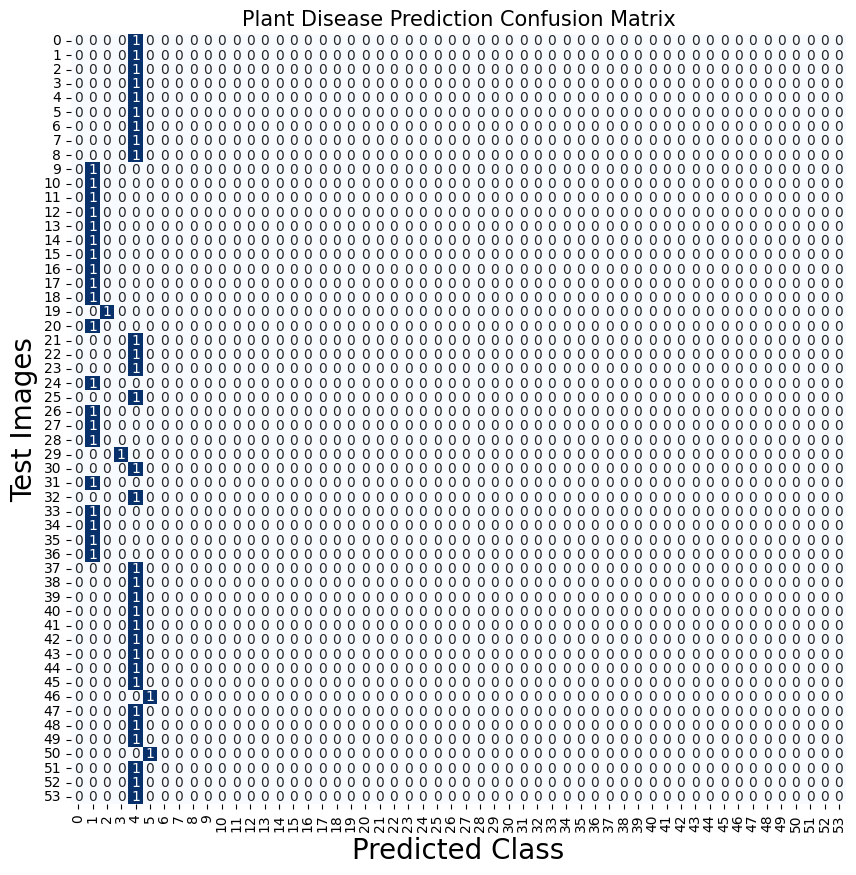

In [146]:
import os
import numpy as np
import cv2
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the trained model
# Replace 'model_path' with the path to your trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/AI_project/AIproject/trained_plant_model.keras')

# Define the path to your test folder
test_folder = '/content/drive/MyDrive/AI_project/AIproject/Test'

# Get the list of image files in the folder
image_files = [os.path.join(test_folder, f) for f in os.listdir(test_folder) if f.endswith(('.jpeg', '.jpg'))]

# Initialize lists to store images and labels
images = []
labels = []

# Load images and assign labels
for image_file in image_files:
    # Load image
    image = cv2.imread(image_file)
    # Preprocess image if needed
    # Add image to list
    images.append(image)
    # Assign label (you may need to adapt this based on your filename convention)
    label = os.path.basename(image_file).split('_')[0]  # Extract label from filename
    labels.append(label)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Create a TensorFlow Dataset from loaded images and labels
test_set = tf.data.Dataset.from_tensor_slices((images, labels))

# Optionally, you can apply transformations to the dataset, such as batching and resizing
# Here's an example:
test_set = test_set.batch(1)  # Batch size 1
test_set = test_set.map(lambda x, y: (tf.image.resize(x, (128, 128)), y))  # Resize images to (128, 128)

# Perform predictions on the test set
predicted_categories = model.predict(test_set)

# Convert predicted probabilities to class labels
predicted_labels = np.argmax(predicted_categories, axis=1)

# Encode true labels using label encoder
label_encoder = LabelEncoder()
true_labels_encoded = label_encoder.fit_transform(labels)

# Compute confusion matrix
cm = confusion_matrix(true_labels_encoded, predicted_labels)

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, annot_kws={"size": 10}, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted Class', fontsize=20)
plt.ylabel('Test Images', fontsize=20)
plt.title('Plant Disease Prediction Confusion Matrix', fontsize=15)
plt.show()

